# Unsupervised Learning: Clustering Lab





In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
import scipy.io.arff as arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. (50%) Implement the k-means clustering algorithm and the HAC (Hierarchical Agglomerative Clustering) algorithm.

### 1.1.1 HAC

### Code requirements 
- HAC should support both single link and complete link options.
- HAC automatically generates all clusterings from n to 1.  To simplify the amount of output you may want to implement a mechanism to specify for which k values actual output will be generated.


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---

In [2]:
class HACClustering(BaseEstimator,ClassifierMixin):

    def __init__(self,k=3,link_type='single'): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            link_type = single or complete. when combining two clusters use complete link or single link
        """
        self.link_type = link_type
        self.k = k
        
    def fit(self, X, y=None,normalize=False):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X = np.copy(X)
        self.y = y
        if normalize:
            self.min_vals = np.min(self.X, axis=0)
            self.max_vals = np.max(self.X, axis=0)

            self.X = (self.X - self.min_vals) / (self.max_vals - self.min_vals)
        
        n = X.shape[0]
        clusters = [[i] for i in range(n)]
        self.X_ = self.X #Store dataset

        #print(self.X_[:2])
        #print(np.linalg.norm((self.X_[0] - self.X_[1])))
        distance_matrix = squareform(pdist(self.X))
        #print(distance_matrix[0:])

        while len(clusters) > self.k:
            #print(distance_matrix[0:])
            min_distance = np.inf
            min_index = (-1, -1)

            for i in range(len(clusters)):
                for j in range(i+1, len(clusters)):
                    distance = self.calculate_distance_between_clusters(clusters[i], clusters[j], distance_matrix)
                    if distance < min_distance:
                        min_distance = distance
                        min_index = (i, j)

            clusters[min_index[0]].extend(clusters[min_index[1]])
            del clusters[min_index[1]]
            #print(clusters[:2])

        self.clusters_ = clusters
        self.labels_ = np.zeros(n, dtype=int)
        for cluster_id, cluster in enumerate(clusters):
            for point in cluster:
                self.labels_[point] = cluster_id
            

        return self

    def calculate_distance_between_clusters(self, clust1, clust2, distance_matrix):
        if self.link_type == 'single':
            return np.min([distance_matrix[i][j] for i in clust1 for j in clust2])
        elif self.link_type == 'complete':
            return np.max([distance_matrix[i][j] for i in clust1 for j in clust2])
        else:
            raise ValueError("link_type must be 'single' or 'complete'")
            
    def print_clusters(self):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        centroids = np.array([np.mean(self.X_[self.labels_ == i], axis=0) for i in range(self.k)])
        cluster_sizes = np.array([len(self.X_[self.labels_ == i]) for i in range(self.k)])
        sil_score = silhouette_score(self.X_, self.labels_)

        
        print("Num clusters: {:d}\n".format(self.k))
        print("Silhouette score: {:.4f}\n\n".format(sil_score))
        
        for i in range(self.k):
            print(np.array2string(centroids[i], precision=4, separator=","))
            print("{:d}\n".format(cluster_sizes[i]))
        
        return sil_score


### 1.1.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


---
The dataset was modified to be a lot smaller. The last datapoint should be on line 359 or the point 0.585,0.46,0.185,0.922,0.3635,0.213,0.285,10. The remaining points should be commented out.


- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.


---
Solutions in files:

[Debug HAC Single (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735819)

[Debug HAC Complete (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735820)

In [12]:
# Debug Here
# Load glass data

# Train on training set

# Predict on test set
mat, meta = arff.loadarff('abalone.arff')
mat = mat.tolist()
data = []
for i in range(len(mat)):
    data.append(mat[i])


HAC = HACClustering(k=5, link_type='single')
data = np.array(data)
HAC.fit(data,normalize=True)
HAC.print_clusters()

HAC = HACClustering(k=5, link_type='complete')
data = np.array(data)
HAC.fit(data,normalize=True)
HAC.print_clusters()




Num clusters: 5

Silhouette score: 0.3453


[0.599 ,0.5923,0.4915,0.2826,0.2682,0.2921,0.2316,0.3849]
195

[0.9189,0.9438,0.7105,0.7016,0.759 ,0.7222,0.4472,0.8824]
1

[1.    ,0.9831,0.8026,0.8343,0.6575,0.7825,0.9221,0.8824]
2

[1.    ,0.9888,0.7895,1.    ,1.    ,0.8915,0.7186,0.5882]
1

[0.9189,0.9888,0.8684,0.719 ,0.5797,0.7512,0.6432,0.9412]
1

Num clusters: 5

Silhouette score: 0.3095


[0.6544,0.649 ,0.5256,0.2879,0.2815,0.3057,0.2288,0.3911]
71

[0.3661,0.3505,0.271 ,0.1008,0.1024,0.1058,0.0836,0.2116]
67

[0.7622,0.7658,0.6759,0.4265,0.4016,0.4536,0.3376,0.5217]
38

[0.8818,0.8904,0.7582,0.614 ,0.5433,0.5317,0.561 ,0.7794]
16

[0.9471,0.934 ,0.8158,0.7457,0.6434,0.7944,0.6457,0.625 ]
8



### 1.1.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)

- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values.

#### 1.1.3.1 Complete Link

In [3]:
# Load evaluation data

# Train on evaluation data using complete link

# Print clusters

mat, meta = arff.loadarff('seismic-bumps_train.arff')
mat = mat.tolist()
data = []
data = np.array(mat).astype(float)


HAC = HACClustering(k=5, link_type='complete')
data = np.array(data)
HAC.fit(data,normalize=True)
HAC.print_clusters()

Num clusters: 5

Silhouette score: 0.2930


[0.3636,0.4107,0.5609,0.3857,0.3937,0.2808,0.3155,0.    ]
49

[0.3471,0.3622,0.7897,0.279 ,0.441 ,0.8568,0.2234,0.    ]
3

[0.1656,0.2226,0.3509,0.2328,0.152 ,0.3424,0.1918,0.    ]
18

[0.7918,0.8268,0.606 ,0.7669,0.7787,0.4634,0.7877,1.    ]
49

[0.5326,0.6002,0.4536,0.5531,0.5144,0.5401,0.6266,1.    ]
21



#### 1.1.3.1 Single Link

In [5]:
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('seismic-bumps_train.arff')
mat = mat.tolist()
data = []
data = np.array(mat).astype(float)


HAC = HACClustering(k=5, link_type='single')
data = np.array(data)
HAC.fit(data,normalize=True)
HAC.print_clusters()


Num clusters: 5

Silhouette score: 0.3971


[0.3159,0.3648,0.5145,0.349 ,0.3338,0.3077,0.2868,0.    ]
67

[0.2774,0.2597,1.    ,0.1224,0.4505,0.7549,0.129 ,0.    ]
1

[0.3065,0.3333,0.6979,0.2792,0.3787,1.    ,0.2373,0.    ]
1

[0.0884,0.1818,0.    ,0.145 ,0.1538,0.1245,0.    ,0.    ]
1

[0.714 ,0.7588,0.5603,0.7028,0.6994,0.4864,0.7393,1.    ]
70



### 1.2.1 K-Means

### Code requirements 
- Ability to choose k and specify k initial centroids
- Use Euclidean Distance as metric
- Ability to handle distance ties
- Include output label as a cluster feature


---
The output should include the following:
- The number of clusters (k).
- The silhouette score of the full clustering. (You can either write and use your own silhouette_score function (extra credit) or use sklearn's)


For each cluster report include:


- The centroid id.
- The number of instances tied to that centroid. 
---
You only need to handle continuous features

In [3]:
class KMEANSClustering(BaseEstimator,ClassifierMixin):

    def __init__(self,k=3,debug=False): ## add parameters here
        """
        Args:
            k = how many final clusters to have
            debug = if debug is true use the first k instances as the initial centroids otherwise choose random points as the initial centroids.
        """
        self.k = k
        self.debug = debug
        
    def euclidean_distance(self, point1, point2):
        return np.sqrt(np.sum((point1 - point2) ** 2))

    def fit(self, X, y=None, normalize=False):
        """ Fit the data; In this lab this will make the K clusters :D
        Args:
            X (array-like): A 2D numpy array with the training data
            y (array-like): An optional argument. Clustering is usually unsupervised so you don't need labels
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.X = np.copy(X)
        self.y = y
        if normalize:
            self.min_vals = np.min(self.X, axis=0)
            self.max_vals = np.max(self.X, axis=0)

            self.X = (self.X - self.min_vals) / (self.max_vals - self.min_vals)
            
        if self.debug:
            initial_centroids = self.X[:self.k]
        else:
            initial_centroids = self.X[np.random.choice(self.X.shape[0], self.k, replace=False)]
            
        centroids = np.array(initial_centroids)
        old_centroids = np.zeros(centroids.shape)
        labels = np.zeros(self.X.shape[0])

        while not np.allclose(centroids, old_centroids, atol=1e-4):
            old_centroids = np.copy(centroids)

            for i, point in enumerate(self.X):
                distances = [self.euclidean_distance(point, centroid) for centroid in centroids]
                labels[i] = np.argmin(distances)

            for i in range(self.k):
                cluster_points = self.X[labels == i]
                centroids[i] = np.mean(cluster_points, axis=0)

        self.centroids_ = centroids
        self.labels_ = labels
        self.silhouette_score_ = silhouette_score(self.X, labels)
        
        return self
    
    def print_clusters(self):
        """
            Used for grading.
            print("Num clusters: {:d}\n".format(k))
            print("Silhouette score: {:.4f}\n\n".format(silhouette_score))
            for each cluster and centroid:
                print(np.array2string(centroid,precision=4,separator=","))
                print("{:d}\n".format(size of cluster))
        """
        
        print("Num clusters: {:d}\n".format(self.k))
        print("Silhouette score: {:.4f}\n\n".format(self.silhouette_score_))
        for i, centroid in enumerate(self.centroids_):
            num_instances = np.sum(self.labels_ == i)
            print(np.array2string(centroid, precision=4, separator=","))
            print("{:d}\n".format(num_instances))
            
        
        return self.silhouette_score_

### 1.2.2 Debug 

Debug your model by running it on the [Debug Abalone Dataset](https://byu.instructure.com/courses/14142/files?preview=4735805)


- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values




---
Solutions in files:

[Debug K Means (Silhouette).txt](https://byu.instructure.com/courses/14142/files?preview=4735840)

In [39]:
# Load debug data

# Train on debug data

# Print clusters
mat, meta = arff.loadarff('abalone.arff')
mat = mat.tolist()
data = []
for i in range(len(mat)):
    data.append(mat[i])


KMean = KMEANSClustering(k=5,debug=True)
data = np.array(data)
KMean.fit(data,normalize=True)
KMean.print_clusters()



Num clusters: 5

Silhouette score: 0.3845


[0.7325,0.7327,0.627 ,0.3817,0.3633,0.4045,0.3046,0.4839]
75

[0.3704,0.3519,0.2686,0.0926,0.0935,0.094 ,0.0792,0.218 ]
34

[0.9035,0.905 ,0.7774,0.6579,0.5767,0.6193,0.5893,0.7279]
24

[0.5692,0.5628,0.4376,0.211 ,0.2113,0.2248,0.1659,0.317 ]
54

[0.1296,0.1037,0.1053,0.0177,0.0211,0.0272,0.0135,0.0724]
13



### 1.2.3 Evaluation

We will evaluate your model based on its print_clusters() output using [Evaluation Seismic-bumps_train Dataset](https://byu.instructure.com/courses/14142/files?preview=4735829)
- Train until convergence
- Make sure to include the output class (last column) as an additional input feature
- Normalize Data
- K = 5
- Use the first k instances as the initial centroids
- Use 4 decimal places and DO NOT ROUND when reporting silhouette score and centroid values

In [40]:
# Load evaluation data

# Train on evaluation data

# Print clusters
mat, meta = arff.loadarff('seismic-bumps_train.arff')
mat = mat.tolist()
data = []
data = np.array(mat).astype(float)


KMean = KMEANSClustering(k=5,debug=True)
data = np.array(data)
KMean.fit(data,normalize=True)
KMean.print_clusters()

Num clusters: 5

Silhouette score: 0.2769


[0.5349,0.6013,0.4617,0.5541,0.5232,0.5544,0.6248,1.    ]
22

[0.3684,0.4338,0.4356,0.4388,0.3573,0.2988,0.3673,0.    ]
31

[0.3658,0.3854,0.7563,0.3093,0.4659,0.3691,0.2413,0.    ]
20

[0.1634,0.2137,0.3968,0.2178,0.1555,0.3078,0.1775,0.    ]
19

[0.7961,0.831 ,0.6054,0.7709,0.7802,0.4553,0.7919,1.    ]
48



## 2.1.1 (7.5%) Clustering the Iris Classification problem - HAC

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

- Use single-link and complete link clustering algorithms
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

Num clusters: 2

Silhouette score: 0.6295


[0.1961,0.5908,0.0786,0.06  ]
50

[0.545 ,0.3633,0.662 ,0.6567]
100

Num clusters: 3

Silhouette score: 0.5309


[0.199 ,0.6003,0.0792,0.0595]
49

[0.0556,0.125 ,0.0508,0.0833]
1

[0.545 ,0.3633,0.662 ,0.6567]
100

Num clusters: 4

Silhouette score: 0.3883


[0.199 ,0.6003,0.0792,0.0595]
49

[0.0556,0.125 ,0.0508,0.0833]
1

[0.5363,0.3554,0.6563,0.6531]
98

[0.9722,0.75  ,0.9407,0.8333]
2

Num clusters: 5

Silhouette score: 0.2051


[0.199 ,0.6003,0.0792,0.0595]
49

[0.0556,0.125 ,0.0508,0.0833]
1

[0.5401,0.357 ,0.657 ,0.6529]
97

[0.1667,0.2083,0.5932,0.6667]
1

[0.9722,0.75  ,0.9407,0.8333]
2

Num clusters: 6

Silhouette score: 0.1605


[0.199 ,0.6003,0.0792,0.0595]
49

[0.0556,0.125 ,0.0508,0.0833]
1

[0.5373,0.3537,0.6548,0.6493]
96

[0.1667,0.2083,0.5932,0.6667]
1

[0.8056,0.6667,0.8644,1.    ]
1

[0.9722,0.75  ,0.9407,0.8333]
2

Num clusters: 7

Silhouette score: 0.1094


[0.199 ,0.6003,0.0792,0.0595]
49

[0.0556,0.125 ,0.0508,0.0833]


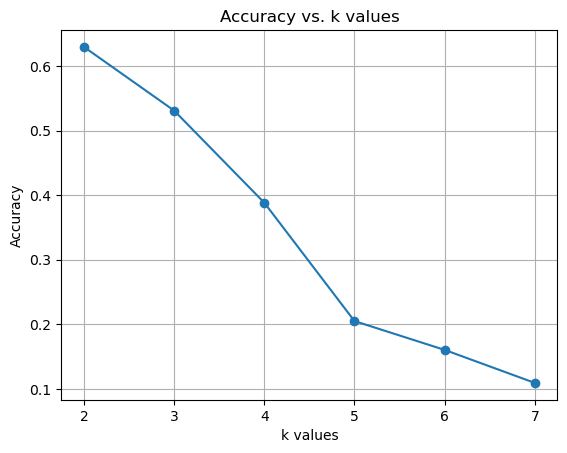

In [19]:
# Iris Classification using single-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
mat = mat.tolist()
data = []
for i in range(len(mat)):
    data.append(mat[i])
    
# Convert the data into a numpy array and remove the class labels (last column)
data = np.array(data, dtype=object)
data = data[:, :-1].astype(float)

k_values = list(range(2, 8, 1))
accuracies = []

for k in k_values:
    HAC = HACClustering(k, link_type='single')
    data = np.array(data)
    HAC.fit(data,normalize=True)
    score = HAC.print_clusters()
    accuracies.append(score)
    
# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k values')
plt.grid()
plt.show()

Num clusters: 2

Silhouette score: 0.3039


[0.3436,0.4318,0.367 ,0.3452]
116

[0.719 ,0.4645,0.8106,0.8419]
34

Num clusters: 3

Silhouette score: 0.5031


[0.1961,0.5908,0.0786,0.06  ]
50

[0.4554,0.3112,0.5855,0.5612]
66

[0.719 ,0.4645,0.8106,0.8419]
34

Num clusters: 4

Silhouette score: 0.3932


[0.2424,0.6742,0.0827,0.0732]
33

[0.1062,0.4289,0.0708,0.0343]
17

[0.4554,0.3112,0.5855,0.5612]
66

[0.719 ,0.4645,0.8106,0.8419]
34

Num clusters: 5

Silhouette score: 0.3368


[0.2424,0.6742,0.0827,0.0732]
33

[0.1062,0.4289,0.0708,0.0343]
17

[0.5368,0.3671,0.6432,0.6295]
37

[0.3515,0.2399,0.512 ,0.4741]
29

[0.719 ,0.4645,0.8106,0.8419]
34

Num clusters: 6

Silhouette score: 0.3292


[0.2424,0.6742,0.0827,0.0732]
33

[0.1062,0.4289,0.0708,0.0343]
17

[0.5368,0.3671,0.6432,0.6295]
37

[0.3515,0.2399,0.512 ,0.4741]
29

[0.6365,0.4601,0.7657,0.8569]
23

[0.8914,0.4735,0.9045,0.8106]
11

Num clusters: 7

Silhouette score: 0.3244


[0.2424,0.6742,0.0827,0.0732]
33

[0.1062,0.4289,0.0708

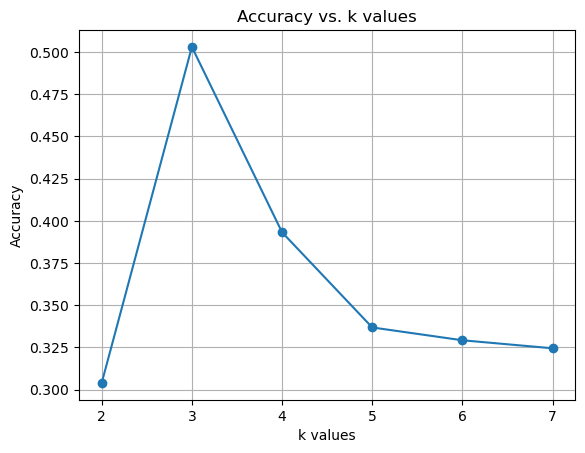

In [20]:
# Iris Classification using complete-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
mat = mat.tolist()
data = []
for i in range(len(mat)):
    data.append(mat[i])
    
# Convert the data into a numpy array and remove the class labels (last column)
data = np.array(data, dtype=object)
data = data[:, :-1].astype(float)

k_values = list(range(2, 8, 1))
accuracies = []

for k in k_values:
    HAC = HACClustering(k, link_type='complete')
    data = np.array(data)
    HAC.fit(data,normalize=True)
    score = HAC.print_clusters()
    accuracies.append(score)
    
# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k values')
plt.grid()
plt.show()


Discuss differences between single-link and complete-link

Single-link:
The silhouette score decreases as the number of clusters (k-value) increases. This could be attributed to the chaining effect that single-link clustering may produce, where clusters can be long and stretched out. As more clusters are formed, the cohesion within the clusters may decrease, leading to lower silhouette scores.

The centroids of the clusters appear to be quite different, with some clusters having centroids close to the boundaries of the feature space. This suggests that single-link clustering may be creating some irregularly-shaped clusters or clusters that are not well-separated.

Complete-link:
The silhouette scores show a different pattern compared to single-link clustering. The highest silhouette score is obtained when the number of clusters is 3, and the scores generally decrease as the number of clusters increases. This indicates that complete-link clustering is better at capturing the underlying structure of the data.

The centroids of the clusters in complete-link clustering are more evenly distributed across the feature space, suggesting that the clusters are more compact and better separated.

## 2.1.2 (5%) Clustering the Iris Classification problem - HAC

Requirements:
- Repeat excercise 2.1.1 and include the output label as one of the input features.

Num clusters: 2

Silhouette score: 0.6398


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.545 ,0.3633,0.662 ,0.6567,0.75  ]
100

Num clusters: 3

Silhouette score: 0.6228


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6356,0.4058,0.7715,0.8025,1.    ]
50

Num clusters: 4

Silhouette score: 0.5535


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6451,0.4099,0.7752,0.8053,1.    ]
49

[0.1667,0.2083,0.5932,0.6667,1.    ]
1

Num clusters: 5

Silhouette score: 0.4725


[0.199 ,0.6003,0.0792,0.0595,0.    ]
49

[0.0556,0.125 ,0.0508,0.0833,0.    ]
1

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6451,0.4099,0.7752,0.8053,1.    ]
49

[0.1667,0.2083,0.5932,0.6667,1.    ]
1

Num clusters: 6

Silhouette score: 0.4347


[0.199 ,0.6003,0.0792,0.0595,0.    ]
49

[0.0556,0.125 ,0.0508,0.0833,0.    ]
1

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6312,0.3954,0.7681,0.8041,1.    ]
47

[0.1667,0.2083,0.5932,0.6667,1.    ]
1

[0.97

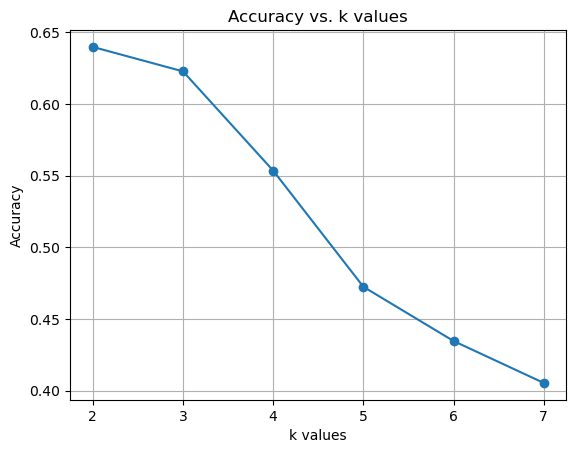

In [32]:
# Clustering Labels using single-link
# Iris Classification using single-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)
    

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))




k_values = list(range(2, 8, 1))
accuracies = []

for k in k_values:
    HAC = HACClustering(k, link_type='single')
    HAC.fit(data_with_labels,normalize=True)
    score = HAC.print_clusters()
    accuracies.append(score)
    
# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k values')
plt.grid()
plt.show()

Num clusters: 2

Silhouette score: 0.6398


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.545 ,0.3633,0.662 ,0.6567,0.75  ]
100

Num clusters: 3

Silhouette score: 0.5146


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.4639,0.3173,0.5947,0.569 ,0.6429]
70

[0.7343,0.4708,0.8192,0.8611,1.    ]
30

Num clusters: 4

Silhouette score: 0.3864


[0.2424,0.6742,0.0827,0.0732,0.    ]
33

[0.1062,0.4289,0.0708,0.0343,0.    ]
17

[0.4639,0.3173,0.5947,0.569 ,0.6429]
70

[0.7343,0.4708,0.8192,0.8611,1.    ]
30

Num clusters: 5

Silhouette score: 0.4288


[0.2424,0.6742,0.0827,0.0732,0.    ]
33

[0.1062,0.4289,0.0708,0.0343,0.    ]
17

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.7343,0.4708,0.8192,0.8611,1.    ]
30

[0.4875,0.3083,0.7   ,0.7146,1.    ]
20

Num clusters: 6

Silhouette score: 0.3674


[0.2424,0.6742,0.0827,0.0732,0.    ]
33

[0.1062,0.4289,0.0708,0.0343,0.    ]
17

[0.578 ,0.4226,0.6045,0.5635,0.5   ]
21

[0.3649,0.2471,0.5149,0.4727,0.5   ]
29

[0.7343,0.4708,0.8192,0.8611,1.    ]
30



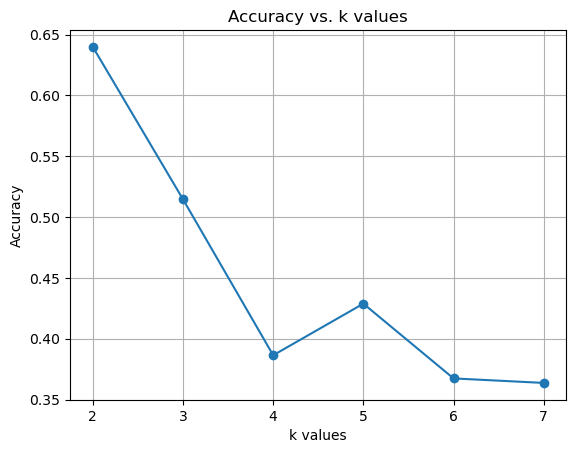

In [33]:
# Clustering Labels using complete-link
# Iris Classification using single-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)
    

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))




k_values = list(range(2, 8, 1))
accuracies = []

for k in k_values:
    HAC = HACClustering(k, link_type='complete')
    HAC.fit(data_with_labels,normalize=True)
    score = HAC.print_clusters()
    accuracies.append(score)
    
# Plot the results
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k values')
plt.grid()
plt.show()

Discuss any differences between the results from 2.1.1 and 2.1.2.

Both single-link and complete-link clustering methods show improved silhouette scores when including the output label. It seems that adding the output label helps in forming more cohesive and separated clusters.Comparing single-link and complete-link results, both methods perform similarly when including the output label. The single-link approach, however, yields slightly better silhouette scores when not including the output label. 


## 2.2.1 (7.5%) Clustering the Iris Classification problem: K-Means

Load the Iris Dataset [Iris Dataset](https://byu.instructure.com/courses/14142/files?preview=4421369)

Run K-Means on the Iris dataset using the output label as a feature and without using the output label as a feature

Requirements:
- State whether you normalize your data or not (your choice).  
- Show your results for clusterings using k = 2-7.  
- Graph the silhouette score for each k and discuss your results (i.e. what kind of clusters are being made).
---

Num clusters: 2

Silhouette score: 0.6295


[0.545 ,0.3633,0.662 ,0.6567]
100

[0.1961,0.5908,0.0786,0.06  ]
50

Num clusters: 3

Silhouette score: 0.5043


[0.7073,0.4509,0.797 ,0.8248]
39

[0.4413,0.3074,0.5757,0.5492]
61

[0.1961,0.5908,0.0786,0.06  ]
50

Num clusters: 4

Silhouette score: 0.4016


[0.7073,0.4509,0.797 ,0.8248]
39

[0.4413,0.3074,0.5757,0.5492]
61

[0.2589,0.6949,0.0823,0.0774]
28

[0.1162,0.4583,0.074 ,0.0379]
22

Num clusters: 5

Silhouette score: 0.3667


[0.6716,0.4404,0.7604,0.7851]
51

[0.4133,0.2832,0.5597,0.523 ]
49

[0.2069,0.5958,0.0788,0.0708]
20

[0.1062,0.4289,0.0708,0.0343]
17

[0.297 ,0.7949,0.0887,0.0769]
13

Num clusters: 6

Silhouette score: 0.3501


[0.2257,0.6146,0.0773,0.0807]
16

[0.412 ,0.2769,0.559 ,0.5208]
48

[0.1358,0.4861,0.08  ,0.037 ]
18

[0.0278,0.3333,0.0466,0.0417]
4

[0.3032,0.8021,0.089 ,0.0729]
12

[0.6677,0.4431,0.7572,0.7821]
52

Num clusters: 7

Silhouette score: 0.3444


[0.2326,0.6068,0.0816,0.0807]
16

[0.412 ,0.2769,0.559 ,

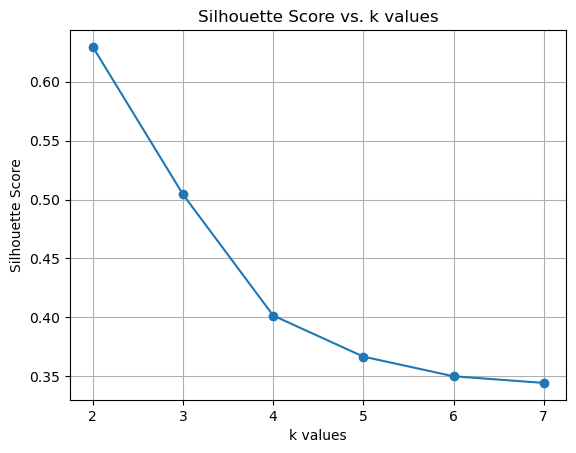

In [37]:
# Iris Classification without output label
# Iris Classification using complete-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
mat = mat.tolist()
data = []
for i in range(len(mat)):
    data.append(mat[i])
    
# Convert the data into a numpy array and remove the class labels (last column)
data = np.array(data, dtype=object)
data = data[:, :-1].astype(float)

k_values = list(range(2, 8, 1))
silhouette_scores = []

for k in k_values:
    KMean = KMEANSClustering(k,debug=True)
    data = np.array(data)
    KMean.fit(data,normalize=True)
    score = KMean.print_clusters()
    silhouette_scores.append(score)
    
# Plot the results
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('k values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k values')
plt.grid()
plt.show()




Num clusters: 2

Silhouette score: 0.6398


[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.545 ,0.3633,0.662 ,0.6567,0.75  ]
100

Num clusters: 3

Silhouette score: 0.6228


[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

Num clusters: 4

Silhouette score: 0.5106


[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.2589,0.6949,0.0823,0.0774,0.    ]
28

[0.1162,0.4583,0.074 ,0.0379,0.    ]
22

Num clusters: 5

Silhouette score: 0.4944


[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.2069,0.5958,0.0788,0.0708,0.    ]
20

[0.1062,0.4289,0.0708,0.0343,0.    ]
17

[0.297 ,0.7949,0.0887,0.0769,0.    ]
13

Num clusters: 6

Silhouette score: 0.4777


[0.2257,0.6146,0.0773,0.0807,0.    ]
16

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.1358,0.4861,0.08  ,0.037 ,0.    ]
18

[0.0278,0.3333,0.0466,0.0417,0.    ]
4

[0.3032,0.8021,0.089 ,0.0729,0.    ]
12

[

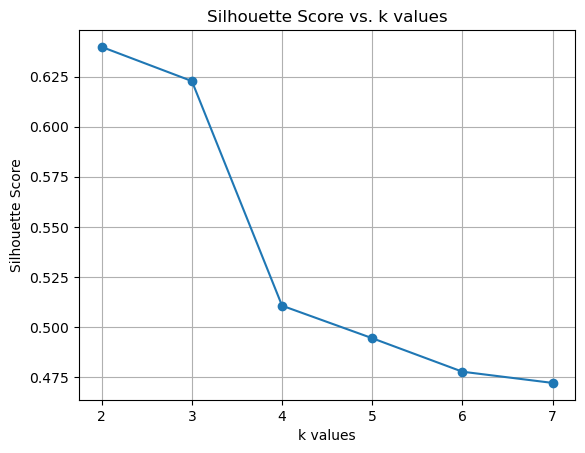

In [38]:
# Iris Classification with output label
# Iris Classification without output label
# Iris Classification using complete-link
# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)
    

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))

k_values = list(range(2, 8, 1))
silhouette_scores = []

for k in k_values:
    KMean = KMEANSClustering(k,debug=True)
    KMean.fit(data_with_labels,normalize=True)
    score = KMean.print_clusters()
    silhouette_scores.append(score)
    
# Plot the results
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('k values')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k values')
plt.grid()
plt.show()




Compare results and differences between using the output label and excluding the output label

When Comparing the two results I was able to observer four things:
-In general, the Silhouette scores when using the output label are slightly higher than when not using the output label.
-The optimal number of clusters based on the highest Silhouette score remains the same for both cases (k=2). However, the Silhouette scores for higher values of k differ between the two cases.
-The cluster centroids are different when using the output label compared to when not using it. This is because the output label's inclusion introduces an additional dimension to the dataset, which influences the calculation of the centroids.
-The number of data points assigned to each cluster is different when using the output label compared to when not using it. In general, the assignments seem to be more balanced when the output label is included.

## 2.2.2 (5%) Clustering the Iris Classification problem: K-Means

Requirements:
- Use the output label as an input feature
- Run K-Means 5 times with k=4, each time with different initial random centroids and discuss any variations in the results. 

Num clusters: 4

Silhouette score: 0.5491


[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

[0.5012,0.3152,0.7074,0.7301,1.    ]
23

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.75  ,0.483 ,0.8261,0.8642,1.    ]
27

Num clusters: 4

Silhouette score: 0.5311


[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.5297,0.4052,0.6014,0.5575,0.5   ]
29

[0.3505,0.2044,0.4851,0.4464,0.5   ]
21

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

Num clusters: 4

Silhouette score: 0.5280


[0.3539,0.2174,0.4923,0.4511,0.5   ]
23

[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.1961,0.5908,0.0786,0.06  ,0.    ]
50

[0.5401,0.409 ,0.6039,0.5617,0.5   ]
27

Num clusters: 4

Silhouette score: 0.5106


[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[0.1162,0.4583,0.074 ,0.0379,0.    ]
22

[0.2589,0.6949,0.0823,0.0774,0.    ]
28

[0.4544,0.3208,0.5525,0.5108,0.5   ]
50

Num clusters: 4

Silhouette score: 0.5106


[0.2589,0.6949,0.0823,0.0774,0.    ]
28

[0.1162,0.4583,0.074 ,0.0379,0.    ]
22

[0.6356,0.4058,0.7715,0.8025,1.    ]
50

[

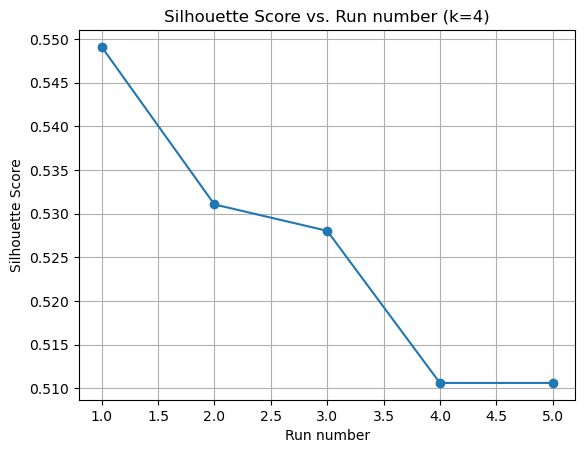

In [7]:
#K-Means 5 times

# Load evaluation data

# Train on evaluation data using single link

# Print clusters

mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)
    

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))

k = 4
num_runs = 5
silhouette_scores = []

for i in range(num_runs):
    KMean = KMEANSClustering(k, debug=False)  # Set random_seed to different values for each run
    KMean.fit(data_with_labels, normalize=True)
    score = KMean.print_clusters()
    silhouette_scores.append(score)

# Print the Silhouette scores for each run
for i, score in enumerate(silhouette_scores, 1):
    print(f"Run {i}: Silhouette score: {score:.4f}")


# Plot the results
plt.plot(range(1, num_runs + 1), silhouette_scores, marker='o')
plt.xlabel('Run number')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Run number (k=4)')
plt.grid()
plt.show()


The silhouette score is a metric that measures how similar an object is to its own cluster compared to other clusters. The score ranges from -1 to 1, where a higher value indicates better clustering results. In my case, the first run has the highest silhouette score (0.5491), suggesting that it has the best clustering results among the five runs.

The variations in the results highlight the importance of using different initial random centroids in the K-Means algorithm. By running the algorithm multiple times with different initializations, we can avoid getting stuck in a local minimum and increase the chance of finding a better clustering solution.

## 3.1 (12.5%) Run the SK versions of HAC (both single and complete link) on iris including the output label and compare your results with those above.
Use the silhouette score for this iris problem(k = 2-7).  You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function from [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) and compare the results. State which metric was used. 
- Possible sklean metrics include (* metrics require ground truth labels):
    - adjusted_mutual_info_score*
    - adjusted_rand_score*
    - homogeneity_score*
    - completeness_score*
    - fowlkes_mallows_score*
    - calinski_harabasz_score
    - davies_bouldin_score
- Experiment using different hyper-parameters. Discuss Results

In [11]:
from scipy.io import arff
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Load data from the iris.arff file
mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

# Encode labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))

k_values = list(range(2, 8, 1))
single_link_scores = []
complete_link_scores = []
single_link_rand_scores = []
complete_link_rand_scores = []

for k in k_values:
    # Train on evaluation data using single link and complete link
    single_link = AgglomerativeClustering(n_clusters=k, linkage='single')
    complete_link = AgglomerativeClustering(n_clusters=k, linkage='complete')

    single_link_labels = single_link.fit_predict(data)
    complete_link_labels = complete_link.fit_predict(data)

    # Calculate silhouette scores
    single_silhouette = silhouette_score(data, single_link_labels)
    complete_silhouette = silhouette_score(data, complete_link_labels)

    # Calculate adjusted Rand scores
    single_rand = adjusted_rand_score(encoded_labels, single_link_labels)
    complete_rand = adjusted_rand_score(encoded_labels, complete_link_labels)

    single_link_scores.append(single_silhouette)
    complete_link_scores.append(complete_silhouette)
    single_link_rand_scores.append(single_rand)
    complete_link_rand_scores.append(complete_rand)

# Print silhouette scores
print("Single Link Silhouette Scores:", single_link_scores)
print("Complete Link Silhouette Scores:", complete_link_scores)

# Print adjusted Rand scores
print("Single Link Adjusted Rand Scores:", single_link_rand_scores)
print("Complete Link Adjusted Rand Scores:", complete_link_rand_scores)


Single Link Silhouette Scores: [0.686393054320485, 0.5118387098679169, 0.28177774041254633, 0.28348367276739417, 0.22111441154309072, 0.13143138164353937]
Complete Link Silhouette Scores: [0.5160600756917315, 0.5133502348107105, 0.4995741149089874, 0.3499977111882981, 0.3420517471508761, 0.3336290155088732]
Single Link Adjusted Rand Scores: [0.5681159420289855, 0.5637510205230709, 0.5617321312902849, 0.5524164690405933, 0.5498675192045569, 0.5396094931299718]
Complete Link Adjusted Rand Scores: [0.4219886317147244, 0.6422512518362898, 0.5894567364350092, 0.4398811975632493, 0.44348952437279465, 0.41891264841947135]


*Record impressions*
The adjusted Rand score is a measure of similarity between two clusterings, considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings. The score ranges from -1 to 1, with 1 being a perfect match, and 0 indicating random assignments. Comparing the adjusted Rand scores for single and complete link methods, we can observe the agreement between the true labels and the predicted clustering labels.

The single-link ARI scores range from 0.5396 to 0.5681, and the complete-link ARI scores range from 0.4189 to 0.6423. These scores are considered relatively good because they are significantly higher than 0, indicating that the clustering assignments are better than random.

## 3.2 (12.5%) Run the SK version of k-means on iris including the output label and compare your results with those above. 

Use the silhouette score for this iris problem(k = 2-7). You may write your own code to do silhouette (optional extra credit) or you can use sklearn.metrics.silhouette_score. Please state if you coded your own silhouette score function to receive the extra credit points (described below). Discuss how helpful Silhouette appeared to be for selecting which clustering is best. You do not need to supply full Silhouette graphs, but you could if you wanted to.

Requirements
- Use the Sillhouette score for this iris problem (k= 2-7) 
- Use at least one other scoring function form sklearn.metrics and compare the results. State which metric was used
- Experiment different hyper-parameters. Discuss Results

In [12]:
# Load sklearn 
import numpy as np
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Load Iris dataset
mat, meta = arff.loadarff('iris.arff')
labels = []
data = []
for row in mat:
    data.append(list(row)[:-1])  # Get all the features except the last one (the label)
    labels.append(row[-1])  # Get the last element (the label)

# Convert the data into a numpy array and convert labels to string
data = np.array(data, dtype=float)
labels = np.array(labels, dtype=object).astype(str)

# Encode labels
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data_with_labels = np.column_stack((data, encoded_labels))

# Perform k-means clustering and compute evaluation metrics
k_values = list(range(2, 8, 1))
silhouette_scores = []
calinski_harabasz_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_with_labels)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(data_with_labels, cluster_labels)
    calinski_harabasz_avg = calinski_harabasz_score(data_with_labels, cluster_labels)
    
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)


# Print results
print("Silhouette scores:", silhouette_scores)
print("Calinski-Harabasz scores:", calinski_harabasz_scores)



Silhouette scores: [0.6798027978592912, 0.5816937070706516, 0.5346108919131404, 0.5134349408478256, 0.3895637498675583, 0.39349777387999507]
Calinski-Harabasz scores: [497.15735363859966, 583.8196093563075, 518.6767041638647, 525.1377448408673, 496.98068872761667, 501.85819620640336]


*Record impressions*
The Calinski-Harabasz (CH) score, also known as the Variance Ratio Criterion, is a metric used to evaluate the quality of clustering algorithms. It measures the ratio of between-cluster dispersion to within-cluster dispersion, with higher scores indicating better clustering performance.the highest CH score of 583.82 is achieved with k=3. This indicates that, among the tested configurations, the K-means algorithm performs best when using 3 clusters. 

The Calinski-Harabasz scores are good because they indicate that the K-means algorithm performs well in separating the Iris dataset into distinct clusters, especially when using k=3. The CH scores and Silhouette scores provide complementary information about the quality of the clustering and suggest that 3 clusters is the optimal choice for this dataset.

## 4. (Optional 5% extra credit) For your silhouette experiment above, write and use your own code to calculate the silhouette scores, rather than the SK or other version. 


*Show findings here*

In [ ]:
# Copy function Below